In [521]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from datetime import datetime

In [522]:
df = pd.read_csv('Data_And_Calculations/SUM_DATA.csv')

In [523]:
df = df.drop('STORE', axis=1)

In [524]:
df.head()

,SALE_DT,SALES
0,2019-01,6.116698e+08
1,2019-02,6.254852e+08
2,2019-03,7.278651e+08
3,2019-04,6.499091e+08
4,2019-05,6.118044e+08


In [525]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,2019-01,6.116698e+08
1,2019-02,6.254852e+08
2,2019-03,7.278651e+08
3,2019-04,6.499091e+08
4,2019-05,6.118044e+08


In [526]:
df.shape

(42, 2)

In [527]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [528]:
df.tail()

,Month,Sales
37,2022-02,5.327292e+08
38,2022-03,7.537410e+08
39,2022-04,6.054326e+08
40,2022-05,5.480671e+08
41,2022-06,5.027106e+08


In [529]:
df.shape

(42, 2)

In [530]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [531]:
df['Month'] = pd.to_datetime(df['Month'])

In [532]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [533]:
df.head()

,Month,Sales
0,2019-01-01,6.116698e+08
1,2019-02-01,6.254852e+08
2,2019-03-01,7.278651e+08
3,2019-04-01,6.499091e+08
4,2019-05-01,6.118044e+08


In [534]:
df.set_index('Month', inplace=True)

In [535]:
df.head()

,Sales
Month,
2019-01-01,6.116698e+08
2019-02-01,6.254852e+08
2019-03-01,7.278651e+08
2019-04-01,6.499091e+08
2019-05-01,6.118044e+08


In [536]:
df.describe()

,Sales
count,4.200000e+01
mean,5.574131e+08
std,1.139248e+08
min,3.519605e+08
25%,4.789646e+08
50%,5.457878e+08
75%,6.101105e+08
max,8.893998e+08


<Axes: xlabel='Month'>

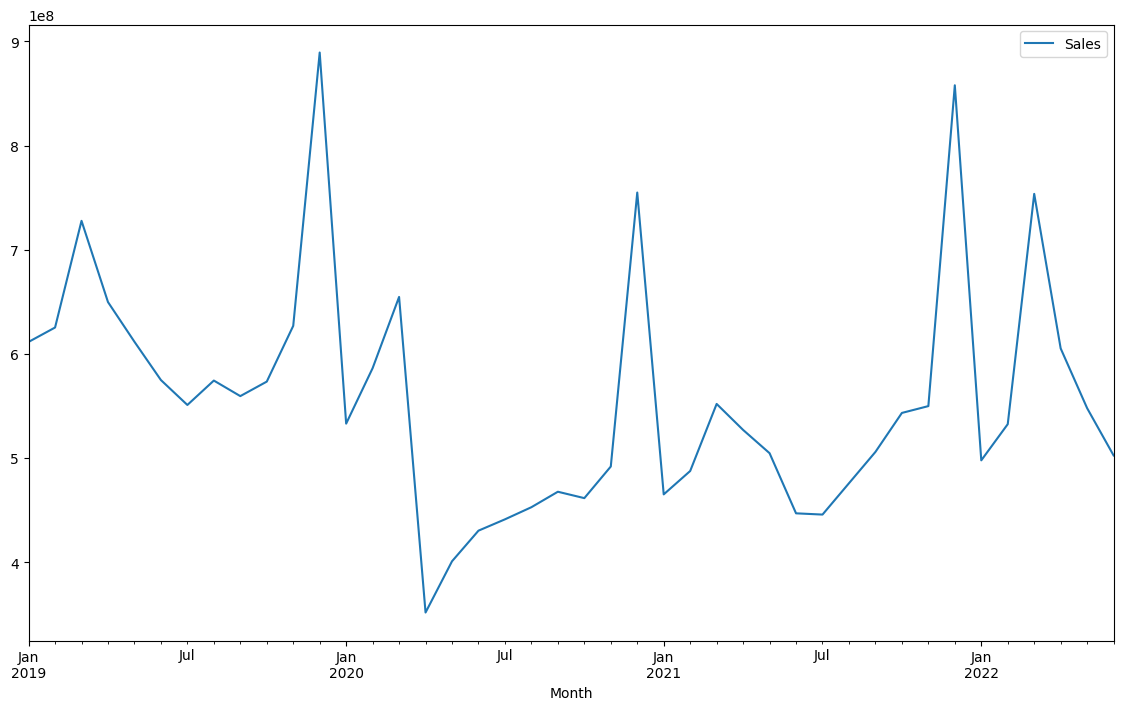

In [537]:
df.plot(figsize=(14,8))


In [538]:
adfuller(df['Sales'])

In [539]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['Статистика теста ADF', 'P-значение', 'Используемые лаги', 'Критерий ADF']
    
    for value, label in zip(result, labels):
        print(f'{label}, {value}')

    if result[1]<=0.05:
        print('Данные стационарны')
    else:
        print('Данные не стационарны')

(-4.821488413501406,
 4.946542437323099e-05,
 0,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 1245.739920785457)

In [540]:
adfuller_test(df['Sales'])

In [541]:
df

Статистика теста ADF, -4.821488413501406
P-значение, 4.946542437323099e-05
Используемые лаги, 0
Критерий ADF, 41
Данные стационарны


In [542]:
df['Sales'].shift(1)

,Sales
Month,
2019-01-01,6.116698e+08
2019-02-01,6.254852e+08
2019-03-01,7.278651e+08
2019-04-01,6.499091e+08
2019-05-01,6.118044e+08
2019-06-01,5.750736e+08
2019-07-01,5.511557e+08
2019-08-01,5.745834e+08
2019-09-01,5.596533e+08


In [543]:
df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

Month
2019-01-01             NaN
2019-02-01    6.116698e+08
2019-03-01    6.254852e+08
2019-04-01    7.278651e+08
2019-05-01    6.499091e+08
2019-06-01    6.118044e+08
2019-07-01    5.750736e+08
2019-08-01    5.511557e+08
2019-09-01    5.745834e+08
2019-10-01    5.596533e+08
2019-11-01    5.735714e+08
2019-12-01    6.270833e+08
2020-01-01    8.893998e+08
2020-02-01    5.332384e+08
2020-03-01    5.864687e+08
2020-04-01    6.548460e+08
2020-05-01    3.519605e+08
2020-06-01    4.011334e+08
2020-07-01    4.305238e+08
2020-08-01    4.413847e+08
2020-09-01    4.530366e+08
2020-10-01    4.678771e+08
2020-11-01    4.617411e+08
2020-12-01    4.920891e+08
2021-01-01    7.550166e+08
2021-02-01    4.653435e+08
2021-03-01    4.877776e+08
2021-04-01    5.521452e+08
2021-05-01    5.271996e+08
2021-06-01    5.048700e+08
2021-07-01    4.471601e+08
2021-08-01    4.459584e+08
2021-09-01    4.760269e+08
2021-10-01    5.060857e+08
2021-11-01    5.435085e+08
2021-12-01    5.500617e+08
2022-01-01    8.579605

In [544]:
df.head()

In [545]:
df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

,Sales,Sales first diff.
Month,,
2019-01-01,6.116698e+08,NaN
2019-02-01,6.254852e+08,1.381540e+07
2019-03-01,7.278651e+08,1.023798e+08
2019-04-01,6.499091e+08,-7.795598e+07
2019-05-01,6.118044e+08,-3.810472e+07


In [546]:
df.head()

Статистика теста ADF, -8.297391554420797
P-значение, 4.1049024818680197e-13
Используемые лаги, 1
Критерий ADF, 39
Данные стационарны


<Axes: xlabel='Month'>

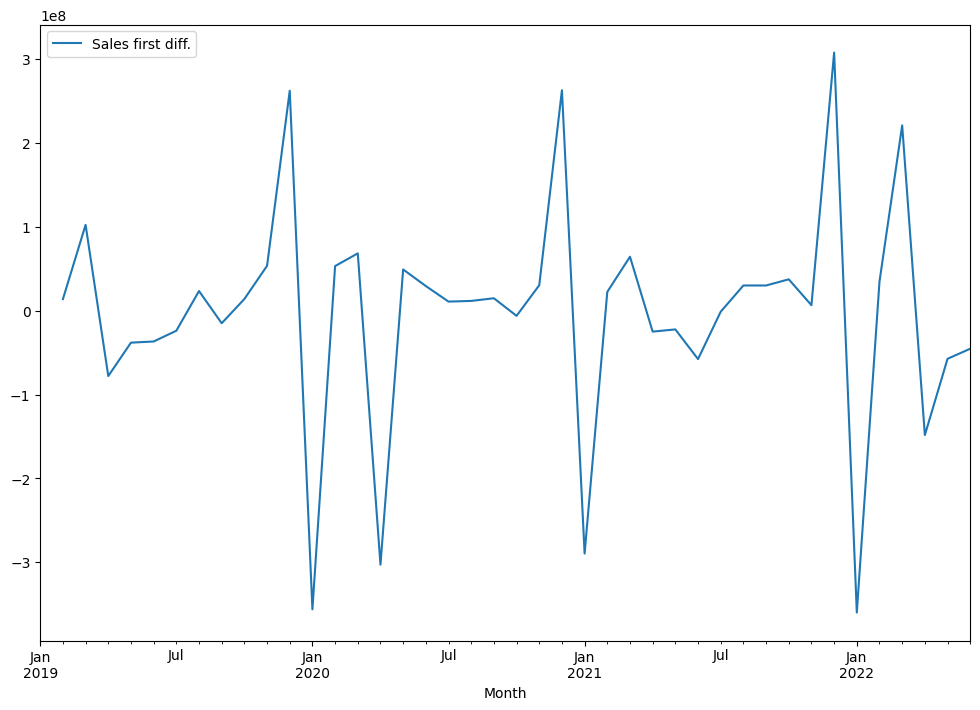

In [547]:
adfuller_test(df['Seasonal first diff.'].dropna())

## Seasonal first diff

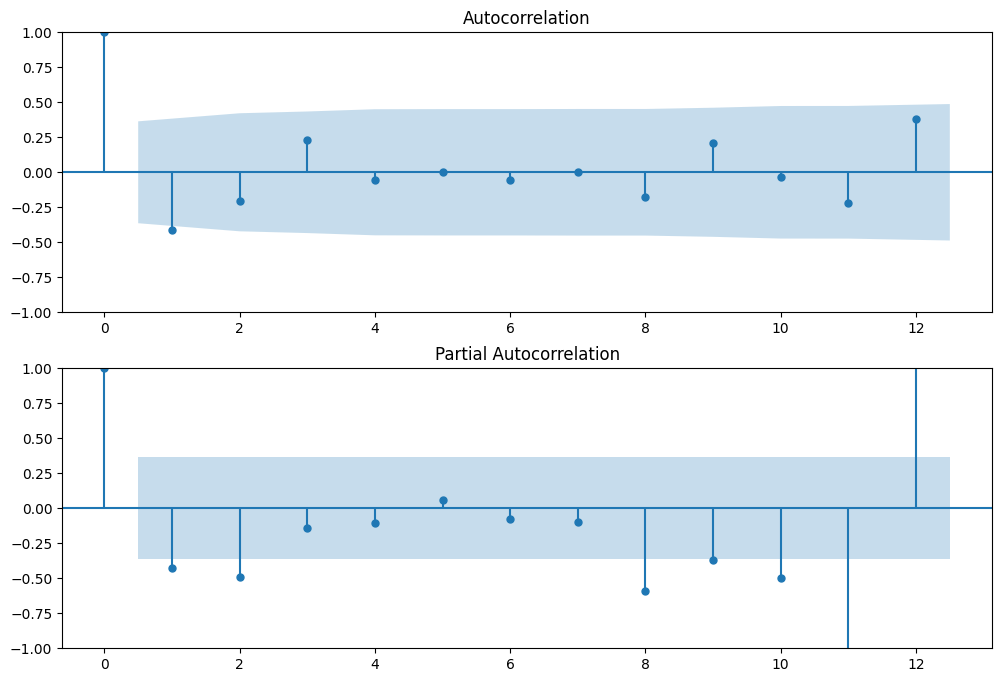

In [548]:
df[['Seasonal first diff.']].plot(figsize=(12,8))

In [549]:
df.head(15)

In [550]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags=10, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags=4, ax=ax2)

In [551]:
model = ARIMA(df['Sales'], order=(1,1,1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -821.762
Date:                Sat, 29 Apr 2023   AIC                           1649.524
Time:                        21:10:33   BIC                           1654.665
Sample:                    01-01-2019   HQIC                          1651.396
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3951      0.158      2.493      0.013       0.084       0.706
ma.L1         -0.9891      0.209     -4.733      0.000      -1.399      -0.580
sigma2      1.563e+16   9.49e-18   1.65e+33      0.000    1.56e+16    1.56e+16
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 4.27
Prob(Q):                              0.58   Prob(JB):                         0.12
Heteroskedasticity (H):               0.82   Skew:                             0.66
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.4e+48. Standard errors may be unstable.
"""

In [552]:
model = model.fit()

(42, 2)

<Axes: xlabel='Month'>

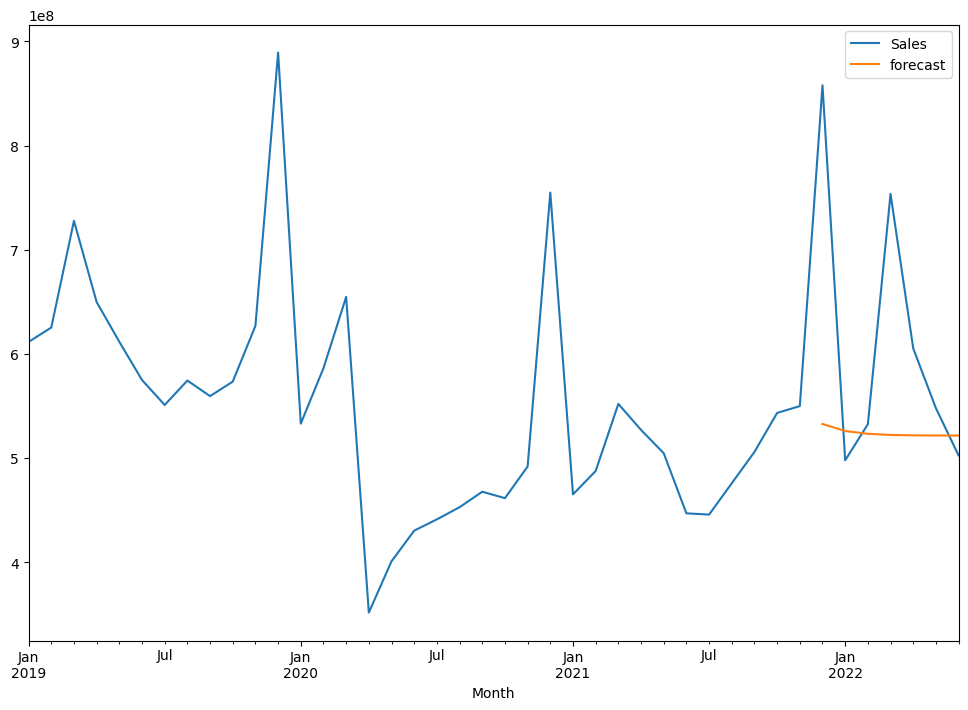

In [553]:
model.summary()

In [554]:
df.shape

In [555]:
# df['forecast'] = model.predict(start=35, end=42, dynamic=True)

In [556]:
# df.tail(20)

In [557]:
# df[['Sales', 'forecast']].plot(figsize=(12,8))

## Построение модели SARIMA

In [558]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

,Sales,Sales first diff.,forecast
Month,,,
2020-11-01,4.920891e+08,3.034795e+07,NaN
2020-12-01,7.550166e+08,2.629275e+08,NaN
2021-01-01,4.653435e+08,-2.896731e+08,NaN
2021-02-01,4.877776e+08,2.243407e+07,NaN
2021-03-01,5.521452e+08,6.436765e+07,NaN
2021-04-01,5.271996e+08,-2.494566e+07,NaN
2021-05-01,5.048700e+08,-2.232959e+07,NaN
2021-06-01,4.471601e+08,-5.770991e+07,NaN
2021-07-01,4.459584e+08,-1.201634e+06,NaN


In [562]:
results = model.fit()

KeyError: "['forecast_SARIMAX'] not in index"

In [561]:
df['forecast_SARIMAX'] = results.predict(start=20, end=42, dynamic=True)

In [ ]:
df.tail(20)

In [ ]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,8))

## На графике видим, что модель SARIMAX показывает довольно точный прогноз, но видны расхождения

## Строим прогноз на будущие периоды

In [ ]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,3)]

In [ ]:
future_dates[1:]

In [ ]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [374]:
future_dataset.tail()

<Axes: >

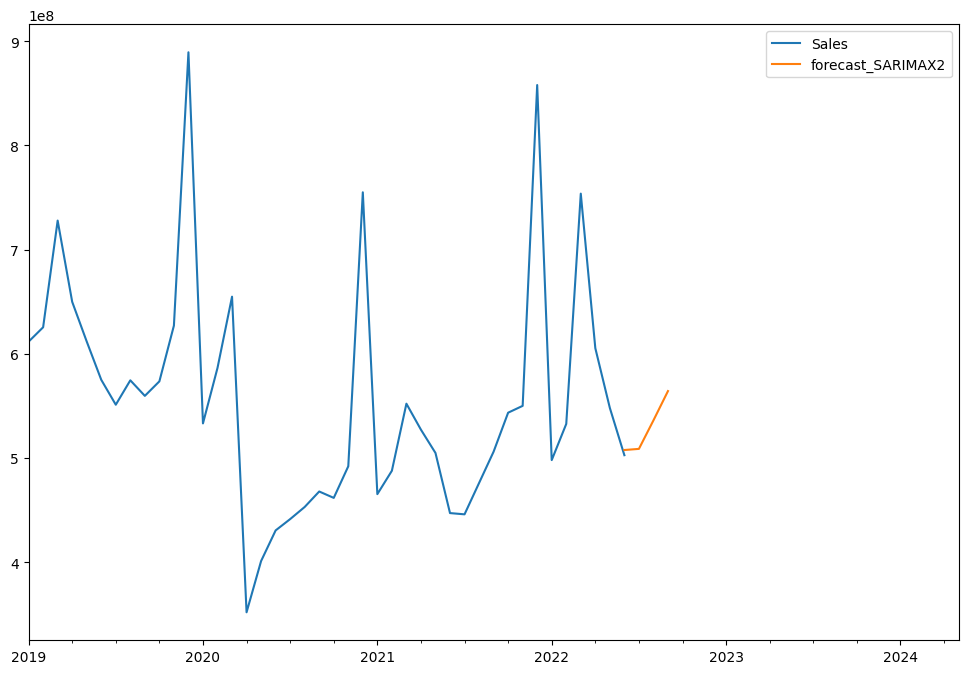

In [375]:
future_df = pd.concat([df, future_dataset])

In [376]:
future_df.shape

<Axes: >

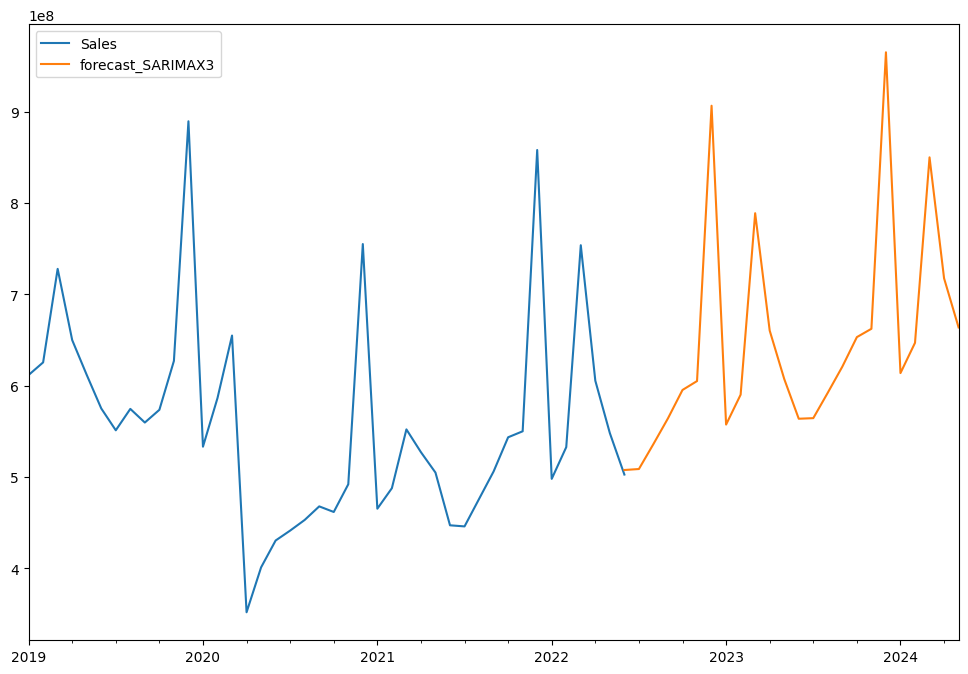

In [377]:
future_df['forecast_SARIMAX2'] = results.predict(start=41, end=44, dynamic=True)

In [ ]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,8))

## Построение прогноза на 07 и 08 месяцы 2022г.

In [ ]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]
future_dates[1:]
future_dataset = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dataset.tail()
future_df = pd.concat([df, future_dataset])
future_df.shape
future_df['forecast_SARIMAX3'] = results.predict(start=41, end=65, dynamic=True)
future_df[['Sales', 'forecast_SARIMAX3']].plot(figsize=(12, 8))

## Бонус! Построение прогноза на последующие 2 года! =)

## Итог для построения прогноза была выбрана модель SARIMAX. Её преимущество перед ARIMA состоит  в том, что она учитывает данные с внешними факторами (сезонность, праздники и тд.)